In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
%matplotlib inline

### 数据准备

In [2]:
news_groups_train = fetch_20newsgroups(data_home='.', subset='train', remove=())
news_groups_test = fetch_20newsgroups(data_home='.', subset='test', remove=())
x_train, y_train = news_groups_train.data, news_groups_train.target
x_sp_train, x_sp_val, y_sp_train, y_sp_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
x_test, y_test = news_groups_test.data, news_groups_test.target

### 数据探索

In [3]:
print(news_groups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
print("20类新闻包样本总数", len(x_sp_train), len(x_sp_val), len(x_test))
print("20类新闻包训练集总数:", len(x_sp_train) + len(x_sp_val), "测试集总数:", len(x_test))
print("训练集数:", len(x_sp_train))
print("验证集数:", len(x_sp_val))
print("测试集数:", len(x_test))

20类新闻包样本总数 9051 2263 7532
20类新闻包训练集总数: 11314 测试集总数: 7532
训练集数: 9051
验证集数: 2263
测试集数: 7532


In [5]:
print(x_sp_train[10])

From: djf@cck.coventry.ac.uk (Marvin Batty)
Subject: Re: Moonbase race
Nntp-Posting-Host: cc_sysk
Organization: Starfleet, Coventry, UK
Lines: 22

In article <1r46o9INN14j@mojo.eng.umd.edu> sysmgr@king.eng.umd.edu writes:
>In article <C5tEIK.7z9@zoo.toronto.edu>, henry@zoo.toronto.edu (Henry Spencer) writes:
>
>>Apollo was done the hard way, in a big hurry, from a very limited
>>technology base... and on government contracts.  Just doing it privately,
>>rather than as a government project, cuts costs by a factor of several.
>
>So how much would it cost as a private venture, assuming you could talk the
>U.S. government into leasing you a couple of pads in Florida? 
>
Why use a ground launch pad. It is entirely posible to launch from altitude.
This was what the Shuttle was originally intended to do! It might be seriously
cheaper. 

Also, what about bio-engineered CO2 absorbing plants instead of many LOX bottles?
Stick 'em in a lunar cave and put an airlock on the door.

-- 
*************

In [6]:
print(y_sp_train[10])

14


### 数据展示

In [7]:
def show_distributation(data):
    dict = {}
    for index, name in enumerate(news_groups_train.target_names):
        dict.setdefault(name, np.sum(data==index))
    print(dict)
    print(dict.keys())
    print(dict.values())
    
    index = np.arange(len(news_groups_train.target_names))
    plt.figure(figsize=(10,5))
    plt.bar(index, dict.values())
    plt.xticks(index, dict.keys(), rotation=90)
    plt.title("category distributation")
    plt.xlabel("data count")
    plt.ylabel("data category")
    plt.show()

{'alt.atheism': 392, 'comp.graphics': 456, 'comp.os.ms-windows.misc': 478, 'comp.sys.ibm.pc.hardware': 462, 'comp.sys.mac.hardware': 458, 'comp.windows.x': 473, 'misc.forsale': 480, 'rec.autos': 477, 'rec.motorcycles': 470, 'rec.sport.baseball': 478, 'rec.sport.hockey': 485, 'sci.crypt': 465, 'sci.electronics': 469, 'sci.med': 495, 'sci.space': 471, 'soc.religion.christian': 472, 'talk.politics.guns': 431, 'talk.politics.mideast': 452, 'talk.politics.misc': 385, 'talk.religion.misc': 302}
dict_keys(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'])
dict_values([392, 456, 478, 462, 458, 473, 480, 477, 470, 478, 485, 465, 469, 495, 471, 472, 431, 452

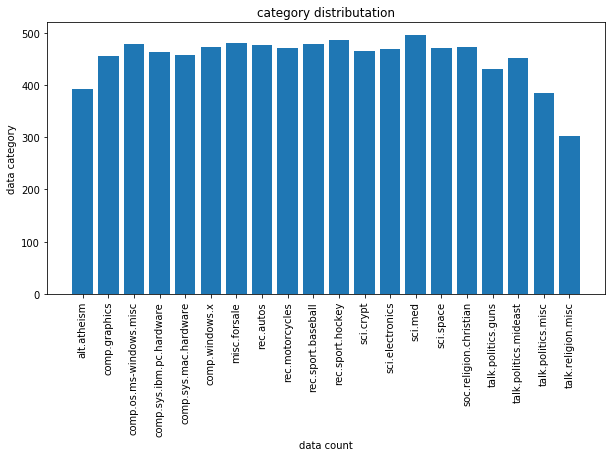

In [8]:
show_distributation(y_sp_train)

{'alt.atheism': 88, 'comp.graphics': 128, 'comp.os.ms-windows.misc': 113, 'comp.sys.ibm.pc.hardware': 128, 'comp.sys.mac.hardware': 120, 'comp.windows.x': 120, 'misc.forsale': 105, 'rec.autos': 117, 'rec.motorcycles': 128, 'rec.sport.baseball': 119, 'rec.sport.hockey': 115, 'sci.crypt': 130, 'sci.electronics': 122, 'sci.med': 99, 'sci.space': 122, 'soc.religion.christian': 127, 'talk.politics.guns': 115, 'talk.politics.mideast': 112, 'talk.politics.misc': 80, 'talk.religion.misc': 75}
dict_keys(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'])
dict_values([88, 128, 113, 128, 120, 120, 105, 117, 128, 119, 115, 130, 122, 99, 122, 127, 115, 112, 80, 

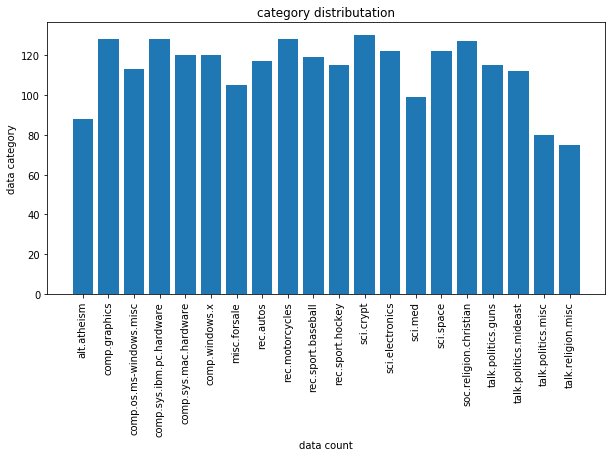

In [9]:
show_distributation(y_sp_val)

{'alt.atheism': 319, 'comp.graphics': 389, 'comp.os.ms-windows.misc': 394, 'comp.sys.ibm.pc.hardware': 392, 'comp.sys.mac.hardware': 385, 'comp.windows.x': 395, 'misc.forsale': 390, 'rec.autos': 396, 'rec.motorcycles': 398, 'rec.sport.baseball': 397, 'rec.sport.hockey': 399, 'sci.crypt': 396, 'sci.electronics': 393, 'sci.med': 396, 'sci.space': 394, 'soc.religion.christian': 398, 'talk.politics.guns': 364, 'talk.politics.mideast': 376, 'talk.politics.misc': 310, 'talk.religion.misc': 251}
dict_keys(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'])
dict_values([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393, 396, 394, 398, 364, 376

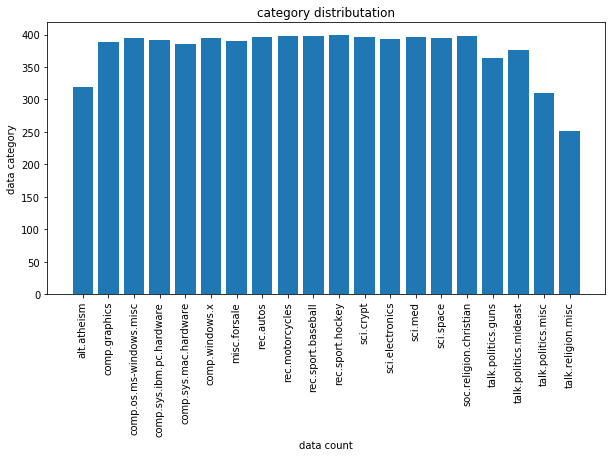

In [10]:
show_distributation(y_test)

In [11]:
def show_words(data):
    count = []
    for f in data:
        count.append(len(f.split()))
    plt.figure(figsize=(10,5))
    plt.hist(count, bins=20)
    plt.title("words distributation")
    plt.xlabel("words count")
    plt.ylabel("words weight")
    plt.show()
    
def show_chars(data):
    count = []
    for f in data:
        count.append(len(f))
    plt.figure(figsize=(10,5))
    plt.hist(count, bins=20)
    plt.title("chars distributation")
    plt.xlabel("chars count")
    plt.ylabel("chars count")
    plt.show()

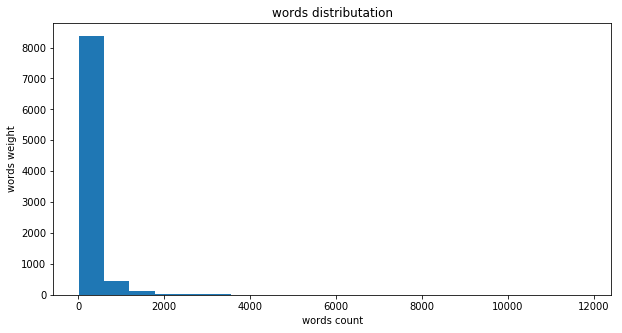

In [12]:
show_words(x_sp_train)

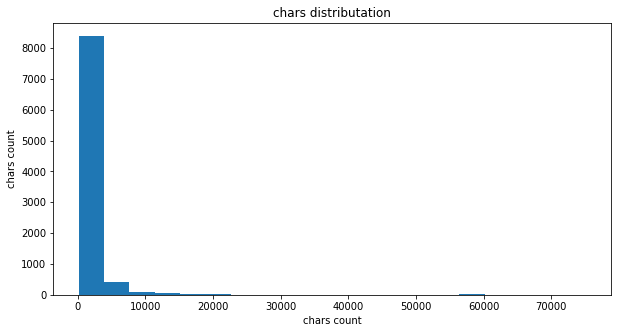

In [13]:
show_chars(x_sp_train)

## 文本表示模型

### BOW

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from time import time

In [15]:
# refer: http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 5 means "ignore terms that appear in less than 5 documents".
    
vectorizer = CountVectorizer(max_df=0.97, min_df=3,
                                max_features=None,
                                stop_words='english')
t0 = time()
vec_x_train = vectorizer.fit_transform(x_sp_train)
print("done in %0.3fs." % (time() - t0))

done in 2.478s.


In [16]:
print(vec_x_train)

  (0, 5537)	1
  (0, 23071)	1
  (0, 17400)	1
  (0, 8721)	1
  (0, 19929)	1
  (0, 32330)	1
  (0, 32889)	1
  (0, 29218)	1
  (0, 12933)	1
  (0, 27225)	1
  (0, 11278)	1
  (0, 5972)	1
  (0, 6703)	1
  (0, 2653)	1
  (0, 345)	1
  (0, 4530)	1
  (0, 33279)	1
  (0, 18614)	1
  (0, 15522)	1
  (0, 21927)	1
  (0, 6193)	1
  (0, 26039)	1
  (0, 25859)	1
  (0, 30321)	1
  (0, 13759)	1
  :	:
  (9050, 19803)	1
  (9050, 23016)	1
  (9050, 9039)	1
  (9050, 26814)	1
  (9050, 23831)	1
  (9050, 12868)	1
  (9050, 5956)	2
  (9050, 8494)	1
  (9050, 1990)	1
  (9050, 8107)	1
  (9050, 31017)	2
  (9050, 7096)	1
  (9050, 453)	1
  (9050, 17293)	1
  (9050, 24730)	1
  (9050, 9927)	1
  (9050, 14327)	2
  (9050, 30156)	3
  (9050, 17976)	1
  (9050, 22917)	3
  (9050, 23572)	1
  (9050, 33294)	1
  (9050, 9444)	2
  (9050, 32932)	1
  (9050, 11617)	2


## TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# refer: http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
tfidf_vectorizer = TfidfVectorizer(max_df=0.97, min_df=2,
                                max_features=None,
                                stop_words='english')
t0 = time()
tfidf_x_sp_train = tfidf_vectorizer.fit_transform(x_sp_train)
tfidf_x_sp_val = tfidf_vectorizer.transform(x_sp_val)

tfidf_x_train = tfidf_vectorizer.transform(x_train)
tfidf_x_test = tfidf_vectorizer.transform(x_test)
print("done in %0.3fs." % (time() - t0))

done in 6.029s.


In [19]:
print(tfidf_x_sp_train.shape)
print(tfidf_x_sp_val.shape)
print(tfidf_x_train.shape)
print(tfidf_x_test.shape)

(9051, 49254)
(2263, 49254)
(11314, 49254)
(7532, 49254)


In [35]:
print(tfidf_x_sp_train)

  (0, 6531)	0.22547672131238686
  (0, 18108)	0.05419741635179298
  (0, 46052)	0.030606072982409156
  (0, 40335)	0.11015011337594552
  (0, 25268)	0.07987346301365322
  (0, 43700)	0.04700116862960857
  (0, 8157)	0.04238054196688091
  (0, 15109)	0.10447882624095957
  (0, 1674)	0.06198853857973
  (0, 1453)	0.07243094287068748
  (0, 2051)	0.07243094287068748
  (0, 33136)	0.008363216499216836
  (0, 6929)	0.05679156273679379
  (0, 13421)	0.05340624841432061
  (0, 27064)	0.03871798282058418
  (0, 22424)	0.08297421642223916
  (0, 45630)	0.015594069482677818
  (0, 4297)	0.04213992125703991
  (0, 2748)	0.07011882723114268
  (0, 2489)	0.07011882723114268
  (0, 31832)	0.05108821106604819
  (0, 39972)	0.0361475466264802
  (0, 45164)	0.09446162859245455
  (0, 17617)	0.045886923316482225
  (0, 43427)	0.05202507904455907
  :	:
  (9050, 7880)	0.1136516373623598
  (9050, 15771)	0.0757977249702075
  (9050, 29114)	0.1064959243656207
  (9050, 43955)	0.09991069779513628
  (9050, 16389)	0.10486546822555864
  

### Word2vec

In [21]:
# refer: https://radimrehurek.com/gensim/models/word2vec.html
# https://www.programcreek.com/python/example/98848/gensim.models.word2vec.Word2Vec
# http://mattmahoney.net/dc/text8.zip
import os
import gensim
from gensim.models import word2vec
EMBEDDING_DIM = 100
if not os.path.isfile('data/w2c/word2vec_model.model'):
    sentences = word2vec.Text8Corpus('data/w2c/text8')
    word2vec_model = word2vec.Word2Vec(sentences, size=EMBEDDING_DIM, min_count=1, sg=0)
    word2vec_model.save('data/w2c/word2vec_model.model')
    print("word2vec_model is saved")
word2vec_model = word2vec.Word2Vec.load('data/w2c/word2vec_model.model')
print("word2vec_model is loaded")

word2vec_model is loaded


In [ ]:
section_acc = {}
total_correct = 0
total_incorrect = 0
for section in word2vec_acc:
    correct = len(section['correct'])
    incorrect = len(section['incorrect'])
    total_correct += correct
    total_incorrect += incorrect
section_acc = float(total_correct) / (total_correct + total_incorrect)
print(section_acc) 

## 机器学习模型

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

def show_performance(model, x_train, y_train, x_val, y_val):    
    results = {}
    results['model_name'] = model.__class__.__name__
    t0 = time()
    model.fit(x_train, y_train)
    results['train_time'] = time() - t0
    t1 = time()
    predicts = model.predict(x_train)
    results['test_time'] = time() - t1
    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val, y_val)
    results['train_score'] = train_score
    results['test_score'] = val_score
    print(results)
    
dt = DecisionTreeClassifier(random_state=0)
show_performance(dt, tfidf_x_sp_train, y_sp_train, tfidf_x_sp_val, y_sp_val)
svc = SVC(kernel='linear', random_state=0)
show_performance(svc, tfidf_x_sp_train, y_sp_train, tfidf_x_sp_val, y_sp_val)
gnb = MultinomialNB()
show_performance(gnb, tfidf_x_sp_train, y_sp_train, tfidf_x_sp_val, y_sp_val)

{'model_name': 'DecisionTreeClassifier', 'train_time': 8.37720775604248, 'test_time': 0.05581521987915039, 'train_score': 0.9998895149707214, 'test_score': 0.6451612903225806}
{'model_name': 'SVC', 'train_time': 75.76889228820801, 'test_time': 51.30510997772217, 'train_score': 0.9938128383604021, 'test_score': 0.9151568714096332}
{'model_name': 'MultinomialNB', 'train_time': 0.04885721206665039, 'test_time': 0.025672197341918945, 'train_score': 0.9594519942547785, 'test_score': 0.8859920459566947}


In [22]:
#refer: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from multiprocessing import cpu_count

def show_performance_with_gscv(name, model, x_train, y_train, params):
    results = {}
    results['model_name'] = name
    gscv = GridSearchCV(model, params, n_jobs=cpu_count()-1, return_train_score=True)
    gscv.fit(x_train, y_train)
    
    results['params'] = gscv.best_params_
    results['train_time'] = np.mean(gscv.cv_results_['mean_fit_time'])
    results['test_time'] = np.mean(gscv.cv_results_['mean_score_time'])
    results['train_score'] = gscv.cv_results_['mean_train_score'][gscv.best_index_]
    results['test_score'] = gscv.cv_results_['mean_test_score'][gscv.best_index_]
    
    results['best_model'] = gscv.best_estimator_
    
    return results
        

In [23]:
params = {'max_depth': [1, 10, 50, 100]}
rs_dt = show_performance_with_gscv('DecisionTree', DecisionTreeClassifier(), tfidf_x_train, y_train, params)
print(rs_dt)

{'model_name': 'DecisionTree', 'params': {'max_depth': 100}, 'train_time': 4.117902318636577, 'test_time': 0.006124138832092284, 'train_score': 0.8809053700295849, 'test_score': 0.6228566377938837, 'best_model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')}


In [24]:
params = {'C': [0.1, 1, 3]}
rs_svc = show_performance_with_gscv('SVC', SVC(kernel='linear'), tfidf_x_train, y_train, params)
print(rs_svc)

{'model_name': 'SVC', 'params': {'C': 3}, 'train_time': 85.96015866597493, 'test_time': 23.868490431043835, 'train_score': 0.9992486986939868, 'test_score': 0.9065759236344352, 'best_model': SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)}


In [47]:
params = {'alpha': [0.0001, 0.5, 0.95]}
rs_nb = show_performance_with_gscv('NaiveBayes', MultinomialNB(), tfidf_x_train, y_train, params)
print(rs_nb)

{'model_name': 'NaiveBayes', 'params': {'alpha': 0.0001}, 'train_time': 0.18088200357225206, 'test_time': 0.03599935107760959, 'train_score': 0.9983207266996299, 'test_score': 0.8891638677744388, 'best_model': MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)}


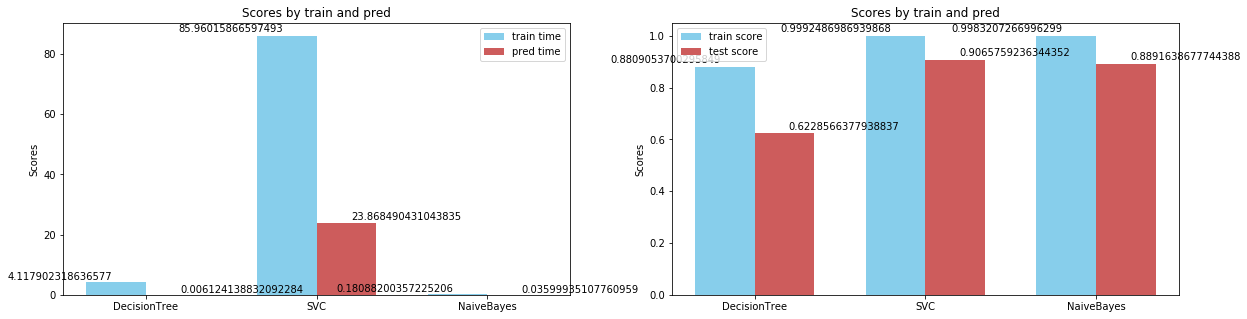

In [48]:
def autolabel(ax, rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        xpos = xpos.lower()  # normalize the case of the parameter
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                    '{}'.format(height), ha=ha[xpos], va='bottom')
            
def show_metrics(rs_dt, rs_svc, rs_nb):
#     https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    train_time = (rs_dt['train_time'], rs_svc['train_time'], rs_nb['train_time'])
    tes_time = (rs_dt['test_time'], rs_svc['test_time'], rs_nb['test_time'])
    
    train_score = (rs_dt['train_score'], rs_svc['train_score'], rs_nb['train_score'])
    test_score = (rs_dt['test_score'], rs_svc['test_score'], rs_nb['test_score'])

    ind = np.arange(len(train_time))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(1, 2, figsize = (20,5))
    rects1 = ax[0].bar(ind - width/2, train_time, width,
                    color='SkyBlue', label='train time')
    rects2 = ax[0].bar(ind + width/2, tes_time, width,
                    color='IndianRed', label='pred time')
    
    rects3 = ax[1].bar(ind - width/2, train_score, width,
                    color='SkyBlue', label='train score')
    rects4 = ax[1].bar(ind + width/2, test_score, width,
                    color='IndianRed', label='test score')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[0].set_ylabel('Scores')
    ax[0].set_title('Scores by train and pred')
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(('DecisionTree', 'SVC', 'NaiveBayes'))
    ax[0].legend()
    autolabel(ax[0], rects1, "left")
    autolabel(ax[0], rects2, "right")
    
    ax[1].set_ylabel('Scores')
    ax[1].set_title('Scores by train and pred')
    ax[1].set_xticks(ind)
    ax[1].set_xticklabels(('DecisionTree', 'SVC', 'NaiveBayes'))
    ax[1].legend()
    autolabel(ax[1], rects3, "left")
    autolabel(ax[1], rects4, "right")

    plt.show()
    
show_metrics(rs_dt, rs_svc, rs_nb)

In [49]:
print("DecisionTree best score", rs_dt['best_model'].score(tfidf_x_test, y_test))
print("svc best score", rs_svc['best_model'].score(tfidf_x_test, y_test))
print("NaiveBayes best score", rs_nb['best_model'].score(tfidf_x_test, y_test))

DecisionTree best score 0.5582846521508231
svc best score 0.8328465215082316
NaiveBayes best score 0.8096123207647371


## text_CNN

In [29]:
#https://keras.io/getting-started/sequential-model-guide/
#https://github.com/dennybritz/cnn-text-classification-tf
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, Input, Flatten, Reshape, concatenate, Dropout
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Embedding
from keras import optimizers
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000

Using TensorFlow backend.


In [30]:
words_count = []
for i in x_train:
    words_count.append(len(text_to_word_sequence(i, split=' ')))
print(np.max(words_count))
print(np.min(words_count))
# 18~ 16333
NUM_WORDS = 20000
MAX_LEN= 1000
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(x_sp_train)
word_index = tokenizer.word_index
x_sp_train_dl = pad_sequences(tokenizer.texts_to_sequences(x_sp_train), maxlen=MAX_LEN)
y_sp_train_dl = to_categorical(np.asarray(y_sp_train), num_classes=20)

x_sp_val_dl = pad_sequences(tokenizer.texts_to_sequences(x_sp_val), maxlen=MAX_LEN)
y_sp_val_dl = to_categorical(np.asarray(y_sp_val), num_classes=20)

x_test_dl = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=MAX_LEN)
y_test_dl = to_categorical(np.asarray(y_test), num_classes=20)

16333
18


In [31]:
def text_CNN(embedding_layer):
    sequence_input = Input(shape=(MAX_LEN,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
   
    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    
    embedded_sequences = Reshape((MAX_LEN, EMBEDDING_DIM, 1))(embedded_sequences)
    x = Conv2D(100, (5, EMBEDDING_DIM), activation='relu')(embedded_sequences)
    x = MaxPooling2D((MAX_LEN - 5 + 1, 1))(x)

    y = Conv2D(100, (4, EMBEDDING_DIM), activation='relu')(embedded_sequences)
    y = MaxPooling2D((MAX_LEN - 4 + 1, 1))(y)

    z = Conv2D(100, (3, EMBEDDING_DIM), activation='relu')(embedded_sequences)
    z = MaxPooling2D((MAX_LEN - 3 + 1, 1))(z)

    alpha = concatenate([x,y,z])
    alpha = Flatten()(alpha)
    alpha = Dropout(0.5)(alpha)
    preds = Dense(len(news_groups_train.target_names), activation='softmax')(alpha)
    model = Model(sequence_input, preds)
    adadelta = optimizers.Adadelta()
        
    model.compile(loss='categorical_crossentropy',
                  optimizer=adadelta,
                  metrics=['acc'])
    return model

In [32]:
def show_history(history):
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [36]:
min_num_words = min(NUM_WORDS, len(word_index))
embedding_matrix = np.zeros((min_num_words+1, EMBEDDING_DIM))

for word, index in word_index.items():
    if index > min_num_words:
        continue
    elif word in word2vec_model:
            embedding_matrix[index] = word2vec_model[word]

print('embedding matrix shape: {}'.format(embedding_matrix.shape))   
embedding_layer = Embedding(min_num_words+1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LEN, 
                            trainable=False)
text_cnn = text_CNN(embedding_layer)
text_cnn.summary()


/Users/i331096/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/Users/i331096/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


embedding matrix shape: (20001, 100)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1000, 100)    2000100     input_2[0][0]                    
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 1000, 100, 1) 0           embedding_2[0][0]                
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 996, 1, 100)  50100       reshape_2[0][0]                  
________________________________________________________________________

In [38]:
# https://keras.io/getting-started/sequential-model-guide/#training
%%time
history = text_cnn.fit(x_sp_train_dl, y_sp_train_dl, validation_data=(x_sp_val_dl, y_sp_val_dl), epochs=30, batch_size=128)


Train on 9051 samples, validate on 2263 samples
Epoch 1/30
9051/9051 [==============================] - 87s 10ms/step - loss: 2.4549 - acc: 0.2630 - val_loss: 1.7538 - val_acc: 0.4821
Epoch 2/30
9051/9051 [==============================] - 84s 9ms/step - loss: 1.6549 - acc: 0.4871 - val_loss: 1.2815 - val_acc: 0.6407
Epoch 3/30
9051/9051 [==============================] - 83s 9ms/step - loss: 1.3483 - acc: 0.5838 - val_loss: 1.1168 - val_acc: 0.6840
Epoch 4/30
9051/9051 [==============================] - 85s 9ms/step - loss: 1.1447 - acc: 0.6520 - val_loss: 1.0053 - val_acc: 0.7048
Epoch 5/30
9051/9051 [==============================] - 86s 10ms/step - loss: 1.0060 - acc: 0.6951 - val_loss: 0.9031 - val_acc: 0.7411
Epoch 6/30
9051/9051 [==============================] - 82s 9ms/step - loss: 0.9015 - acc: 0.7249 - val_loss: 0.8723 - val_acc: 0.7464
Epoch 7/30
9051/9051 [==============================] - 80s 9ms/step - loss: 0.8140 - acc: 0.7589 - val_loss: 0.8269 - val_acc: 0.7636
Epoch

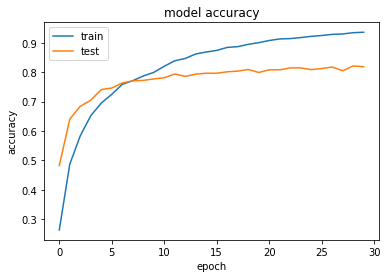

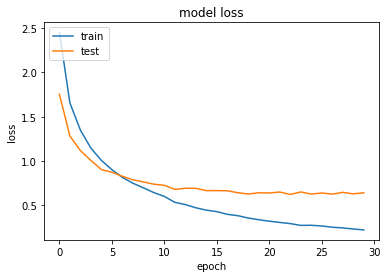

In [39]:
show_history(history.history)

In [40]:
print(text_cnn.evaluate(x_test_dl, y_test_dl, batch_size=128))

7532/7532 [==============================] - 26s 3ms/step
[0.9194534627035205, 0.7299522037083205]
